Import Libraries and Read Input

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

df = pd.read_csv('Amazon_Stock.csv')

Data Pre-processing

In [2]:
scaler = MinMaxScaler()
normalized_prices = scaler.fit_transform(df['Close'].values.reshape(-1, 1))


Prepair Training Data

In [3]:
sequence_length = 10
X_train = []
y_train = []

for i in range(len(normalized_prices) - sequence_length):
    X_train.append(normalized_prices[i:i+sequence_length])
    y_train.append(normalized_prices[i+sequence_length])

X_train = np.array(X_train)
y_train = np.array(y_train)


Build LSTM Model

In [4]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

Training the model

In [5]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
193/193 [==============================] - 10s 6ms/step - loss: 0.0024
Epoch 2/50
193/193 [==============================] - 1s 6ms/step - loss: 1.5215e-04
Epoch 3/50
193/193 [==============================] - 1s 6ms/step - loss: 1.4874e-04
Epoch 4/50
193/193 [==============================] - 1s 6ms/step - loss: 1.2679e-04
Epoch 5/50
193/193 [==============================] - 1s 6ms/step - loss: 1.2794e-04
Epoch 6/50
193/193 [==============================] - 1s 6ms/step - loss: 1.2447e-04
Epoch 7/50
193/193 [==============================] - 1s 8ms/step - loss: 1.2795e-04
Epoch 8/50
193/193 [==============================] - 1s 8ms/step - loss: 1.2676e-04
Epoch 9/50
193/193 [==============================] - 1s 6ms/step - loss: 1.1072e-04
Epoch 10/50
193/193 [==============================] - 1s 6ms/step - loss: 1.2116e-04
Epoch 11/50
193/193 [==============================] - 1s 6ms/step - loss: 1.0866e-04
Epoch 12/50
193/193 [==============================] - 1s 6ms/step

Predictions

In [6]:
test_data = normalized_prices[len(normalized_prices) - len(X_train):]
X_test = []

for i in range(len(test_data) - seaquence_length):
    X_test.append(test_data[i:i+sequence_length])

X_test = np.array(X_test)
predictions = model.predict(X_test)

192/192 [==============================] - 1s 3ms/step


Visualisation

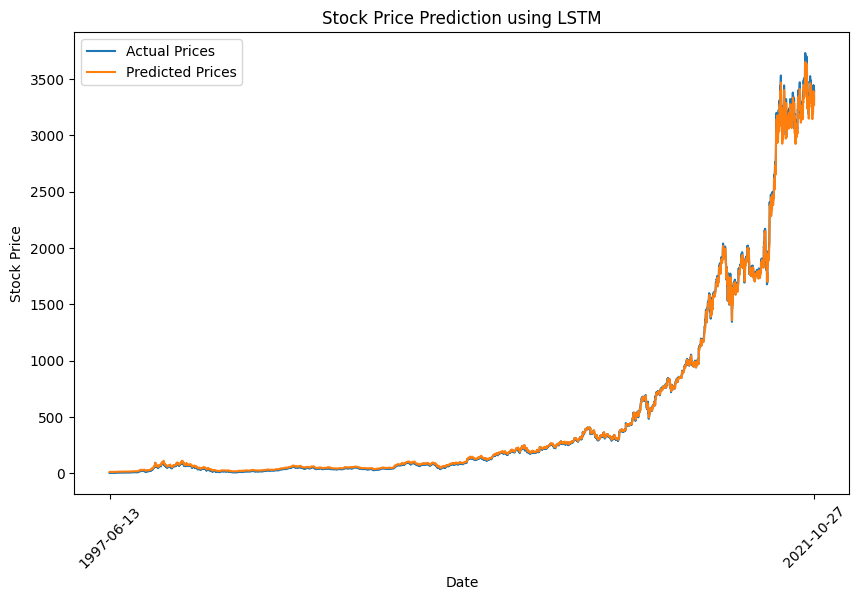

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'][-len(actual_prices):], actual_prices, label='Actual Prices')
plt.plot(df['Date'][-len(actual_prices):], predicted_prices, label='Predicted Prices')

start_date = df['Date'].iloc[-len(actual_prices)]
end_date = df['Date'].iloc[-1]
plt.xticks([start_date, end_date], rotation=45)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()
